In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

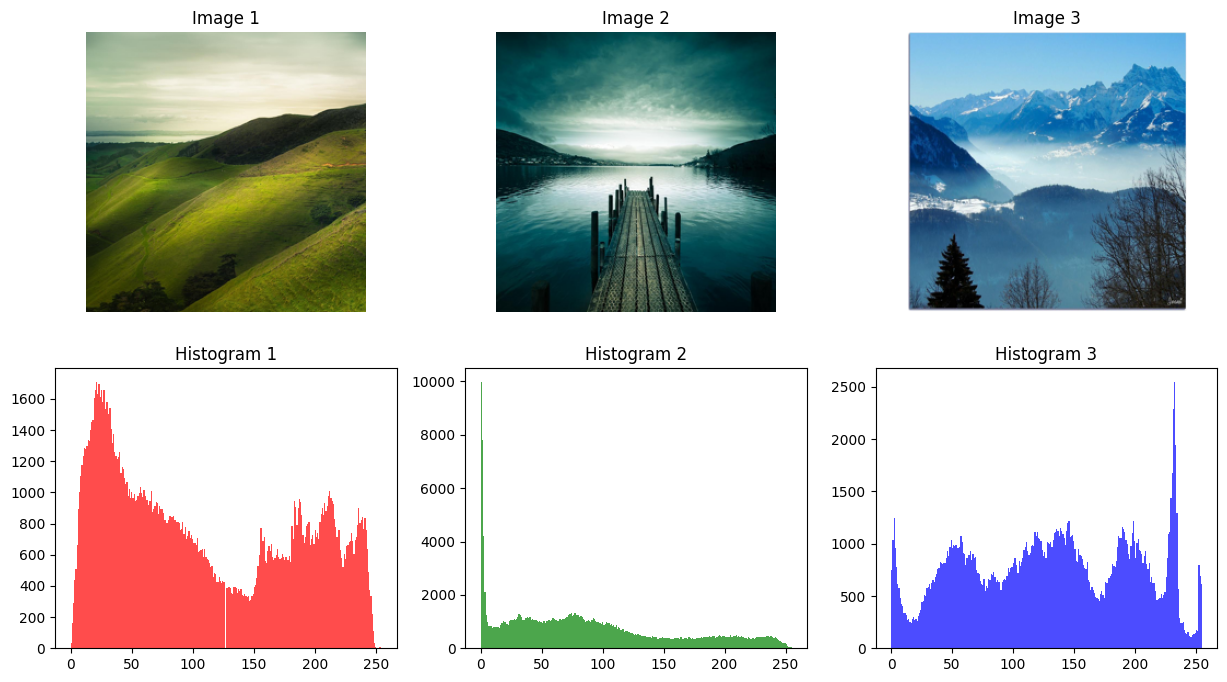

Várható érték és szórás az első képre:
[-7.81437975e-16 -5.02552701e-14  1.42387357e-14] [1. 1. 1.]
Várható érték és szórás a második képre:
[-2.91237269e-14  2.81601863e-15 -8.31318792e-16] [1. 1. 1.]
Várható érték és szórás a harmadik képre:
[-1.74771222e-14  3.04537754e-14 -9.43368376e-15] [1. 1. 1.]


In [3]:
import PIL
import numpy as np
import matplotlib.pyplot as plt
img1 = PIL.Image.open("../input/landscape-pictures/00000000.jpg").resize((256, 256))
img2 = PIL.Image.open("../input/landscape-pictures/00000000_(2).jpg").resize((256, 256))
img3 = PIL.Image.open("../input/landscape-pictures/00000000_(3).jpg").resize((256, 256))
rgb_pixels1 = np.array(img1)
rgb_pixels2 = np.array(img2)
rgb_pixels3 = np.array(img3)
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs[0, 0].imshow(rgb_pixels1)
axs[0, 0].axis('off')
axs[0, 1].imshow(rgb_pixels2)
axs[0, 1].axis('off')

axs[0, 2].imshow(rgb_pixels3)
axs[0, 2].axis('off')
axs[1, 0].hist(rgb_pixels1.flatten(), bins=256, color='red', alpha=0.7)
axs[1, 0].set_title('Histo 1')

axs[1, 1].hist(rgb_pixels2.flatten(), bins=256, color='green', alpha=0.7)
axs[1, 1].set_title('Histo 2')

axs[1, 2].hist(rgb_pixels3.flatten(), bins=256, color='blue', alpha=0.7)
axs[1, 2].set_title('Histo 3')
plt.show()
def normalize_image(image):
    channel_means = np.mean(image, axis=(0, 1))
    channel_stds = np.std(image, axis=(0, 1))

    normalized_image = (image - channel_means) / channel_stds

    return normalized_image
normalized_img1 = normalize_image(rgb_pixels1)
normalized_img2 = normalize_image(rgb_pixels2)
normalized_img3 = normalize_image(rgb_pixels3)
print("első kép:")
print(np.mean(normalized_img1, axis=(0, 1)), np.std(normalized_img1, axis=(0, 1)))

print("második kép:")
print(np.mean(normalized_img2, axis=(0, 1)), np.std(normalized_img2, axis=(0, 1)))

print("harmadik kép:")
print(np.mean(normalized_img3, axis=(0, 1)), np.std(normalized_img3, axis=(0, 1)))

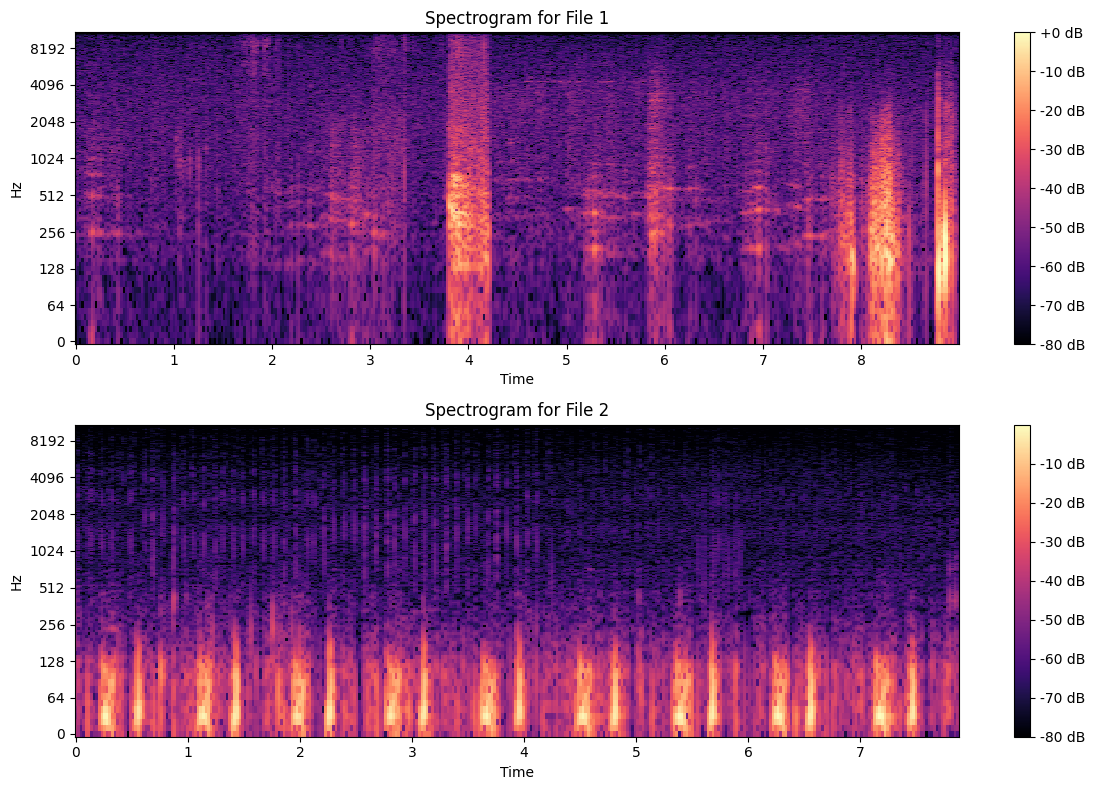

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

file_path_1 = "../input/heartbeat-sounds/set_a/Aunlabelledtest__201012172010.wav"
file_path_2 = "../input/heartbeat-sounds/set_a/Aunlabelledtest__201101051105.wav"
y1, sr1 = librosa.load(file_path_1)
y2, sr2 = librosa.load(file_path_2)
D1 = librosa.amplitude_to_db(np.abs(librosa.stft(y1)), ref=np.max)
D2 = librosa.amplitude_to_db(np.abs(librosa.stft(y2)), ref=np.max)

#spektrogrammmok
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
librosa.display.specshow(D1, sr=sr1, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.subplot(2, 1, 2)
librosa.display.specshow(D2, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

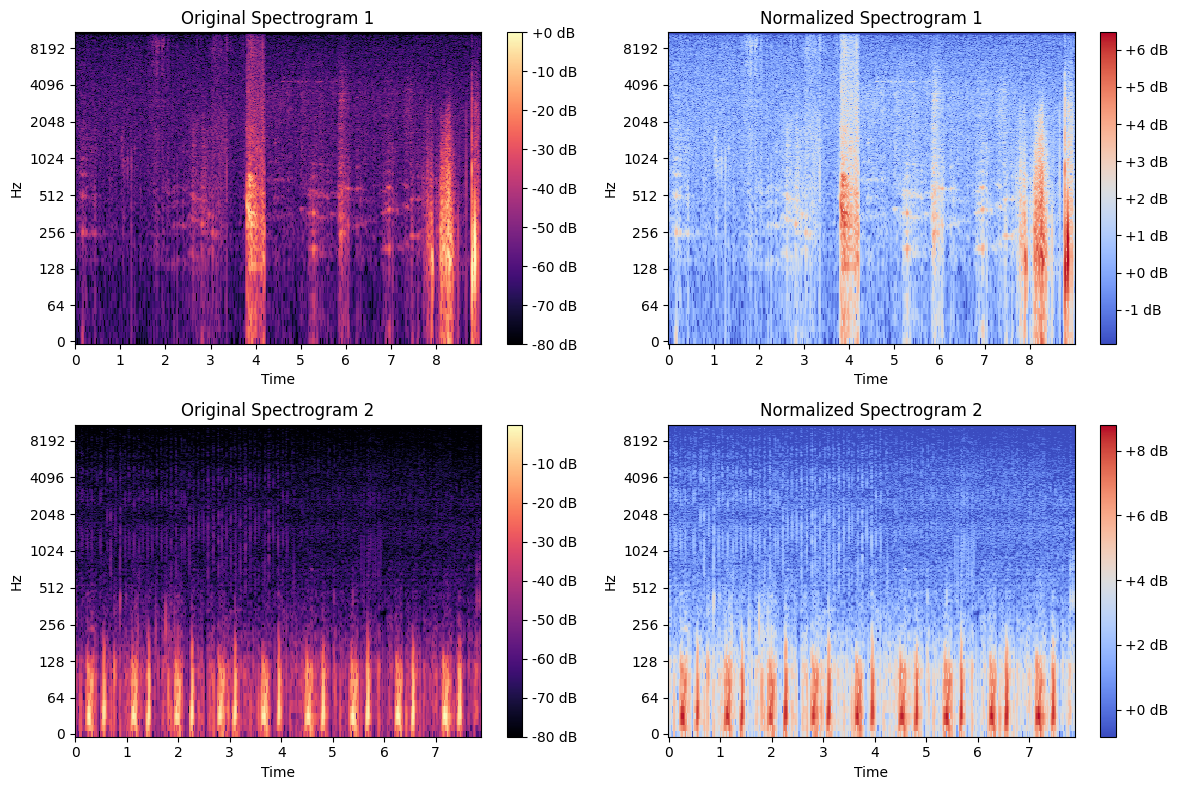

Mean and std for normalized Spectrogram 1:
-1.3827677e-07 1.0000001
Mean and std for normalized Spectrogram 2:
1.2224545e-07 1.0


In [9]:
#itt van a 4. feladat a 3.al
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def normalize_spectrogram(spec):
    mean_val = np.mean(spec)
    std_val = np.std(spec)

    normalized_spec = (spec - mean_val) / std_val

    return normalized_spec

file_path_1 = "../input/heartbeat-sounds/set_a/Aunlabelledtest__201012172010.wav"
file_path_2 = "../input/heartbeat-sounds/set_a/Aunlabelledtest__201101051105.wav"
y1, sr1 = librosa.load(file_path_1)
y2, sr2 = librosa.load(file_path_2)
D1 = librosa.amplitude_to_db(np.abs(librosa.stft(y1)), ref=np.max)
D2 = librosa.amplitude_to_db(np.abs(librosa.stft(y2)), ref=np.max)
normalized_D1 = normalize_spectrogram(D1)
normalized_D2 = normalize_spectrogram(D2)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
librosa.display.specshow(D1, sr=sr1, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.subplot(2, 2, 2)
librosa.display.specshow(normalized_D1, sr=sr1, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.subplot(2, 2, 3)
librosa.display.specshow(D2, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.subplot(2, 2, 4)
librosa.display.specshow(normalized_D2, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
print(np.mean(normalized_D1), np.std(normalized_D1))
print(np.mean(normalized_D2), np.std(normalized_D2))

In [10]:
import requests
import matplotlib.pyplot as plt
from collections import Counter
from bs4 import BeautifulSoup

url = "http://smartlab.tmit.bme.hu/oktatas-deep-learning"

# Oldal tartalmának letöltése
response = requests.get(url)
html_content = response.text

# Szöveg kinyerése az HTML-ből
soup = BeautifulSoup(html_content, 'html.parser')
text_content = soup.get_text()

# Szöveg megjelenítése
print("Weboldal tartalma:")
print(text_content)

# Betűk gyakoriságának számolása
letter_counts = Counter(c.lower() for c in text_content if c.isalpha())

# Hisztogram megjelenítése
plt.bar(letter_counts.keys(), letter_counts.values())
plt.xlabel('Betűk')
plt.ylabel('Gyakoriság')
plt.title('Betűk gyakoriságának hisztogramja')
plt.show()

ConnectionError: HTTPConnectionPool(host='smartlab.tmit.bme.hu', port=80): Max retries exceeded with url: /oktatas-deep-learning (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7985c1eb7be0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))